# Sessie 5 - Niet-lineaire vergelijkingen

Voer de onderstaande code uit.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, stats

def plot_performance(x, y):
    plt.xlabel('Parameter')
    plt.ylabel('Performance')
    plt.plot(x, y)
    plt.show()

## Parameter optimalisatie

Sommige methodes kunnen afhankelijk van hun parametrische instellingen beter of slechter werken (b.v., predictie algoritmen, routing in netwerken, load balancing en simulators).
'Parameter tuning' is dus een essentieel onderdeel bij de applicatie van zulke algoritmes.

Een bijkomende limitatie is dat sommige algoritmes te lang duren om extensief de optimale parameter te zoeken.
Om dit probleem aan te pakken, kunnen we enkele equidistante parameters (<code>data_x</code>) bepalen, en zo een benaderende functie proberen te bepalen die de bekomen performanties (<code>data_y</code>) verklaart.

In [2]:
data_x = [0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10.]
data_y = [10., 10.84147098, 11.81859485, 10.42336002, 6.97279002, 5.20537863,
          8.32350701, 14.59890619, 17.91486597, 13.70906637, 4.55978889]

Hoe we zo'n benaderende functie kunnen bepalen (regressie), zien we in een latere sessie, maar op het moment is deze gegeven (<code>f(x)</code>).

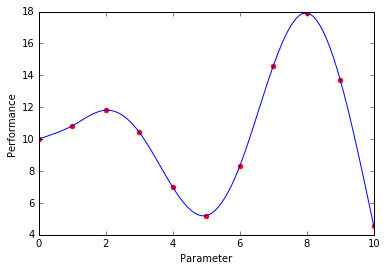

In [3]:
%run model.py

# Regression model
f = create_model(data_x, data_y)

# Plot 100 points and their values according to the model f.
x = np.linspace(0, 10, 100)
y = list(map(f, x))
plt.plot(data_x, data_y, 'r.', markersize=10)
plot_performance(x, y)

Deze functie heeft geen expliciete formule gegeven. Het enige wat we weten, is dat deze functie minstens twee keer differentieerbaar is. Gegeven deze functie <code>f(x)</code> over het interval $x \in [0, 10]$, kan je het extremum (en dus de optimale parameter) vinden? Welke stappen zou je kunnen volgen om een oplossing te bekomen?


## 1. Zoek de afgeleides

Aangezien we geen expliciete functie hebben, moeten we de afgeleide benaderen. Gebruik hiervoor Taylor.

In [4]:
def derive(f, x, h):
    """
    Approximate the derivative of the function f in x.
    The approximation goes towards the actual derivative when h goes towards infinity.
    """
    
    #h is de limiet. bij het zoeken van afgeleiden neem je die best zo klein mogelijk
    
    return (f(x+h)-f(x))/h

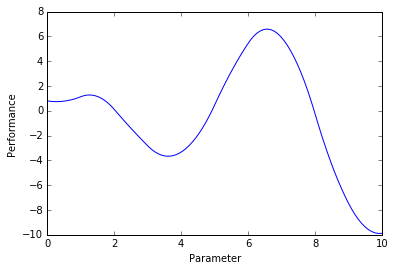

In [5]:
### TEST ###

# Define the derivative of f
h = 1e-5
df = lambda x: derive(f, x, h)
ddf = lambda x: derive(df, x, h)

# Plot the performance over 100 points.
x = np.linspace(0, 10, 100)
y = list(map(df, x))
plot_performance(x, y)

Gegeven de eerste afgeleide, kan je met deze methode ook de tweede afgeleide berekenen?

## 2a. Methode van Newton

Implementeer de methode van Newton en ontwerp een algoritme die een extremum vindt in een gegeven functie m.b.v. Newton.
Dit algoritme heet het Gauss-Newton algoritme.

In [8]:
def newton(f, df, a, tol):
    """
    Compute the root of f using Newton's algorithm starting at 'a'.
    The procedure is stopped when the error reaches 'tol'.
    """
    
    fout = float("+inf")
    
    while fout > tol:
        x = a
        if df(x) == 0:
            #De richtingscoefficient is nul
            #We hebben het resultaat gevonden
            fout = 0
        else:
            part = 1
            a = x - f(x)/df(x)
            fout = abs(x-a)
    return a

def find_extremum(f, a, tol):
    """
    Find an extremum in f starting from 'a' using the method 'newton'.
    The procedure is stopped when the error reaches 'tol'.
    """
    h = 1e-5
    df = lambda x: derive(f, x, h)
    #hier nemen we de tweede afgeleide
    #omdat we het nulpunt zoeken van de afgeleide
    ddf = lambda x: derive(df, x, h)
    extreme = newton(df, ddf, a, tol)
    
    return extreme

In [9]:
### TEST ###
tol = 1e-15
zero = find_extremum(f, 8, tol)
epsilon = 1e-3
print("Optimale parameter z: ", zero)
print("Hoogste performantie f(z): ", f(zero))
print("Lokale waarden naast het extremum: links -", f(zero - epsilon), ' / rechts - ', f(zero + epsilon))

Optimale parameter z:  7.97002615321
Hoogste performantie f(z):  17.9189377995
Lokale waarden naast het extremum: links - 17.9189332518  / rechts -  17.9189333401


De lokale waarden hierboven zouden kleiner moeten zijn dan het gevonden extremum.

## 2b. Tweede mogelijkheid

De geconstrueerde methode geeft een benadering op verschillende niveaus:<br>

* Newton geeft een benadering op de wortel
* Taylor geeft een benadering op de tweede afgeleide ($f''(x) \approx f''(\xi)$ met $\xi \in [x, x+h]$)
* Taylor geeft een benadering op de eerste afgeleide ($f'(x) \approx f'(\xi)$ met $\xi \in [x, x+h]$)
* <code>f(x)</code> is een model van de effectieve onderliggende functie

Kan je een methode construeren die enkel gebruik maakt van de eerste afgeleide.

In [ ]:
def find_root(f, a, tol):
    

def find_extremum2(f, a, tol):
    """
    Find an extremum in f starting from 'a' using the method 'find_root'.
    The procedure is stopped when the error reaches 'tol'.
    """
    pass ### CODE HERE ###

In [ ]:
### TEST ###
tol = 1e-15
zero = find_extremum2(f, 8, tol)
epsilon = 1e-3
print("Optimale parameter z: ", zero)
print("Hoogste performantie f(z): ", f(zero))
print("Lokale waarden naast het extremum: links -", f(zero - epsilon), ' / rechts - ', f(zero + epsilon))